<a href="https://colab.research.google.com/github/Poorya0071/GAN_MNIST/blob/main/GAN_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### In this project, my aim is to learn the GAN architecture with a straightforward example, MNIST data set.




Let's import required libraries.

In [1]:
import zipfile
import numpy as np
import tensorflow as tf
import matplotlib.pyplot  as plt
import time
import os
import random
import matplotlib.image as mpimg
from tensorflow import keras
from tensorflow.keras import Sequential, layers
from tensorflow.keras.layers import Conv2D, LeakyReLU, Flatten, Dropout, Dense, Conv2DTranspose, BatchNormalization , Input, UpSampling2D, Reshape
from tensorflow.keras.models import Model

Let's define the GAN class.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 1024)              803840    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 256)               0

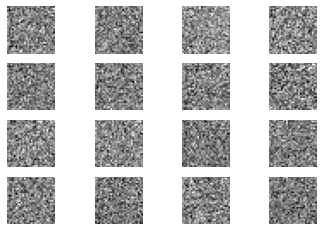

2/2 [==============================] - 0s 16ms/step
1 [D loss: 0.403439, acc.: 81.25%] [G loss: 0.587147]
2/2 [==============================] - 0s 18ms/step
2 [D loss: 0.378749, acc.: 69.53%] [G loss: 0.603231]
2/2 [==============================] - 0s 19ms/step
3 [D loss: 0.361126, acc.: 72.66%] [G loss: 0.666050]
2/2 [==============================] - 0s 16ms/step
4 [D loss: 0.331437, acc.: 89.06%] [G loss: 0.759889]
2/2 [==============================] - 0s 17ms/step
5 [D loss: 0.290246, acc.: 98.44%] [G loss: 0.855109]
2/2 [==============================] - 0s 17ms/step
6 [D loss: 0.236523, acc.: 100.00%] [G loss: 1.034828]
2/2 [==============================] - 0s 17ms/step
7 [D loss: 0.176852, acc.: 100.00%] [G loss: 1.189914]
2/2 [==============================] - 0s 17ms/step
8 [D loss: 0.135827, acc.: 100.00%] [G loss: 1.369864]
2/2 [==============================] - 0s 18ms/step
9 [D loss: 0.110258, acc.: 100.00%] [G loss: 1.572945]
2/2 [==============================] - 0s 

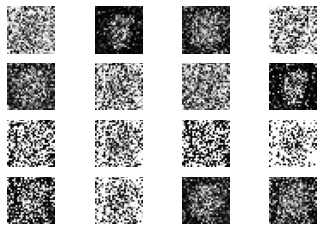

2/2 [==============================] - 0s 17ms/step
101 [D loss: 0.494448, acc.: 84.38%] [G loss: 4.105385]
2/2 [==============================] - 0s 17ms/step
102 [D loss: 0.188146, acc.: 89.84%] [G loss: 3.632536]
2/2 [==============================] - 0s 20ms/step
103 [D loss: 0.163519, acc.: 92.97%] [G loss: 4.220869]
2/2 [==============================] - 0s 19ms/step
104 [D loss: 0.358896, acc.: 87.50%] [G loss: 3.960133]
2/2 [==============================] - 0s 23ms/step
105 [D loss: 0.190106, acc.: 91.41%] [G loss: 4.200132]
2/2 [==============================] - 0s 17ms/step
106 [D loss: 0.174874, acc.: 92.97%] [G loss: 4.409878]
2/2 [==============================] - 0s 18ms/step
107 [D loss: 0.384211, acc.: 82.03%] [G loss: 4.288220]
2/2 [==============================] - 0s 21ms/step
108 [D loss: 0.425048, acc.: 82.81%] [G loss: 4.146708]
2/2 [==============================] - 0s 22ms/step
109 [D loss: 0.200194, acc.: 91.41%] [G loss: 3.803632]
2/2 [=======================

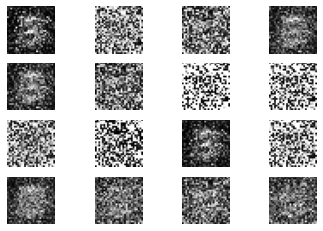

2/2 [==============================] - 0s 20ms/step
201 [D loss: 0.211966, acc.: 88.28%] [G loss: 3.897511]
2/2 [==============================] - 0s 20ms/step
202 [D loss: 0.289239, acc.: 85.16%] [G loss: 3.330226]
2/2 [==============================] - 0s 18ms/step
203 [D loss: 0.339786, acc.: 78.91%] [G loss: 3.738019]
2/2 [==============================] - 0s 20ms/step
204 [D loss: 0.194221, acc.: 96.88%] [G loss: 3.676658]
2/2 [==============================] - 0s 19ms/step
205 [D loss: 0.299900, acc.: 84.38%] [G loss: 3.747456]
2/2 [==============================] - 0s 19ms/step
206 [D loss: 0.184679, acc.: 96.88%] [G loss: 3.440475]
2/2 [==============================] - 0s 17ms/step
207 [D loss: 0.286463, acc.: 81.25%] [G loss: 3.320523]
2/2 [==============================] - 0s 18ms/step
208 [D loss: 0.299688, acc.: 81.25%] [G loss: 3.704624]
2/2 [==============================] - 0s 17ms/step
209 [D loss: 0.197181, acc.: 93.75%] [G loss: 3.244800]
2/2 [=======================

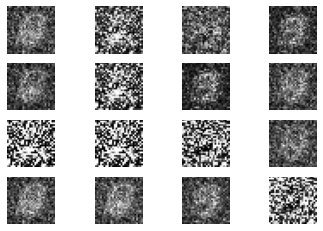

2/2 [==============================] - 0s 23ms/step
301 [D loss: 0.377501, acc.: 75.78%] [G loss: 2.839725]
2/2 [==============================] - 0s 18ms/step
302 [D loss: 0.283987, acc.: 85.94%] [G loss: 3.163254]
2/2 [==============================] - 0s 23ms/step
303 [D loss: 0.589327, acc.: 64.06%] [G loss: 2.276498]
2/2 [==============================] - 0s 19ms/step
304 [D loss: 0.223913, acc.: 94.53%] [G loss: 2.683083]
2/2 [==============================] - 0s 22ms/step
305 [D loss: 0.279152, acc.: 95.31%] [G loss: 2.364984]
2/2 [==============================] - 0s 24ms/step
306 [D loss: 0.307928, acc.: 78.91%] [G loss: 2.613799]
2/2 [==============================] - 0s 19ms/step
307 [D loss: 0.562644, acc.: 64.84%] [G loss: 2.328430]
2/2 [==============================] - 0s 19ms/step
308 [D loss: 0.239134, acc.: 92.97%] [G loss: 2.597442]
2/2 [==============================] - 0s 19ms/step
309 [D loss: 0.199371, acc.: 97.66%] [G loss: 2.594302]
2/2 [=======================

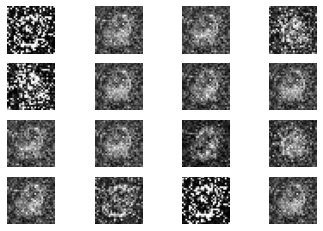

2/2 [==============================] - 0s 20ms/step
401 [D loss: 0.202177, acc.: 96.09%] [G loss: 3.203334]
2/2 [==============================] - 0s 22ms/step
402 [D loss: 0.336274, acc.: 88.28%] [G loss: 2.494556]
2/2 [==============================] - 0s 20ms/step
403 [D loss: 0.166075, acc.: 99.22%] [G loss: 3.350589]
2/2 [==============================] - 0s 19ms/step
404 [D loss: 0.311770, acc.: 88.28%] [G loss: 2.660325]
2/2 [==============================] - 0s 19ms/step
405 [D loss: 0.311059, acc.: 92.19%] [G loss: 3.315163]
2/2 [==============================] - 0s 19ms/step
406 [D loss: 0.285721, acc.: 92.97%] [G loss: 3.278879]
2/2 [==============================] - 0s 19ms/step
407 [D loss: 0.281172, acc.: 92.97%] [G loss: 3.049719]
2/2 [==============================] - 0s 19ms/step
408 [D loss: 0.195376, acc.: 100.00%] [G loss: 3.543586]
2/2 [==============================] - 0s 23ms/step
409 [D loss: 0.490696, acc.: 73.44%] [G loss: 2.665362]
2/2 [======================

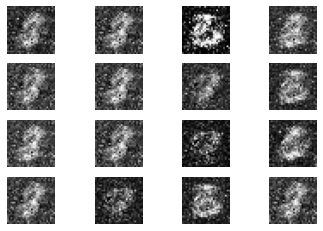

2/2 [==============================] - 0s 23ms/step
501 [D loss: 0.492089, acc.: 82.03%] [G loss: 1.573914]
2/2 [==============================] - 0s 21ms/step
502 [D loss: 0.400073, acc.: 86.72%] [G loss: 1.840029]
2/2 [==============================] - 0s 23ms/step
503 [D loss: 0.539931, acc.: 75.00%] [G loss: 1.502143]
2/2 [==============================] - 0s 28ms/step
504 [D loss: 0.473717, acc.: 78.91%] [G loss: 1.832851]
2/2 [==============================] - 0s 21ms/step
505 [D loss: 0.453311, acc.: 82.03%] [G loss: 1.970556]
2/2 [==============================] - 0s 23ms/step
506 [D loss: 0.555874, acc.: 71.09%] [G loss: 1.694325]
2/2 [==============================] - 0s 21ms/step
507 [D loss: 0.436574, acc.: 85.94%] [G loss: 1.931570]
2/2 [==============================] - 0s 20ms/step
508 [D loss: 0.597395, acc.: 69.53%] [G loss: 1.428398]
2/2 [==============================] - 0s 23ms/step
509 [D loss: 0.409260, acc.: 82.81%] [G loss: 1.956131]
2/2 [=======================

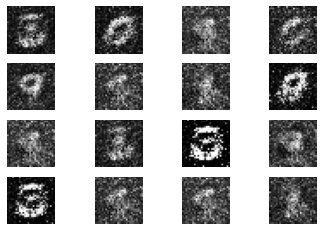

2/2 [==============================] - 0s 28ms/step
601 [D loss: 0.583558, acc.: 71.09%] [G loss: 1.323811]
2/2 [==============================] - 0s 34ms/step
602 [D loss: 0.507001, acc.: 75.00%] [G loss: 1.407059]
2/2 [==============================] - 0s 27ms/step
603 [D loss: 0.572144, acc.: 71.09%] [G loss: 1.394285]
2/2 [==============================] - 0s 20ms/step
604 [D loss: 0.538843, acc.: 77.34%] [G loss: 1.330462]
2/2 [==============================] - 0s 21ms/step
605 [D loss: 0.524585, acc.: 75.78%] [G loss: 1.375489]
2/2 [==============================] - 0s 23ms/step
606 [D loss: 0.444922, acc.: 82.81%] [G loss: 1.430965]
2/2 [==============================] - 0s 21ms/step
607 [D loss: 0.516699, acc.: 75.00%] [G loss: 1.370479]
2/2 [==============================] - 0s 22ms/step
608 [D loss: 0.490933, acc.: 77.34%] [G loss: 1.442638]
2/2 [==============================] - 0s 23ms/step
609 [D loss: 0.554883, acc.: 69.53%] [G loss: 1.405845]
2/2 [=======================

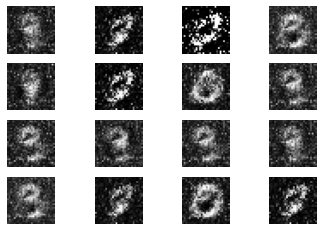

2/2 [==============================] - 0s 26ms/step
701 [D loss: 0.513315, acc.: 76.56%] [G loss: 1.394108]
2/2 [==============================] - 0s 26ms/step
702 [D loss: 0.544335, acc.: 73.44%] [G loss: 1.374460]
2/2 [==============================] - 0s 23ms/step
703 [D loss: 0.473941, acc.: 85.16%] [G loss: 1.456108]
2/2 [==============================] - 0s 23ms/step
704 [D loss: 0.446668, acc.: 89.06%] [G loss: 1.483938]
2/2 [==============================] - 0s 24ms/step
705 [D loss: 0.523209, acc.: 75.00%] [G loss: 1.381087]
2/2 [==============================] - 0s 29ms/step
706 [D loss: 0.506048, acc.: 75.78%] [G loss: 1.351279]
2/2 [==============================] - 0s 25ms/step
707 [D loss: 0.557710, acc.: 76.56%] [G loss: 1.382928]
2/2 [==============================] - 0s 29ms/step
708 [D loss: 0.502794, acc.: 79.69%] [G loss: 1.517131]
2/2 [==============================] - 0s 20ms/step
709 [D loss: 0.561408, acc.: 71.88%] [G loss: 1.417874]
2/2 [=======================

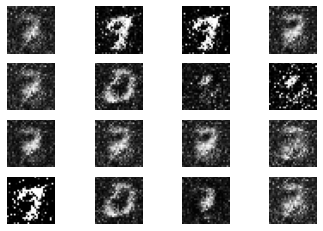

2/2 [==============================] - 0s 25ms/step
801 [D loss: 0.479048, acc.: 83.59%] [G loss: 1.401632]
2/2 [==============================] - 0s 29ms/step
802 [D loss: 0.543500, acc.: 77.34%] [G loss: 1.472650]
2/2 [==============================] - 0s 22ms/step
803 [D loss: 0.516287, acc.: 83.59%] [G loss: 1.500778]
2/2 [==============================] - 0s 22ms/step
804 [D loss: 0.505562, acc.: 83.59%] [G loss: 1.313187]
2/2 [==============================] - 0s 24ms/step
805 [D loss: 0.462956, acc.: 85.16%] [G loss: 1.562610]
2/2 [==============================] - 0s 28ms/step
806 [D loss: 0.496809, acc.: 79.69%] [G loss: 1.552310]
2/2 [==============================] - 0s 23ms/step
807 [D loss: 0.498200, acc.: 79.69%] [G loss: 1.447025]
2/2 [==============================] - 0s 21ms/step
808 [D loss: 0.472146, acc.: 85.16%] [G loss: 1.367898]
2/2 [==============================] - 0s 25ms/step
809 [D loss: 0.485308, acc.: 82.81%] [G loss: 1.311835]
2/2 [=======================

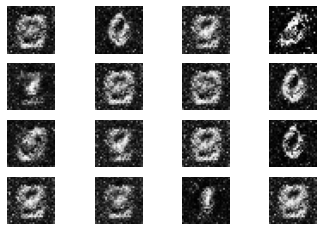

2/2 [==============================] - 0s 25ms/step
901 [D loss: 0.460017, acc.: 87.50%] [G loss: 1.478248]
2/2 [==============================] - 0s 21ms/step
902 [D loss: 0.456011, acc.: 80.47%] [G loss: 1.490821]
2/2 [==============================] - 0s 22ms/step
903 [D loss: 0.435449, acc.: 81.25%] [G loss: 1.669126]
2/2 [==============================] - 0s 23ms/step
904 [D loss: 0.499140, acc.: 83.59%] [G loss: 1.569406]
2/2 [==============================] - 0s 24ms/step
905 [D loss: 0.481961, acc.: 78.91%] [G loss: 1.556782]
2/2 [==============================] - 0s 26ms/step
906 [D loss: 0.456312, acc.: 82.81%] [G loss: 1.575367]
2/2 [==============================] - 0s 23ms/step
907 [D loss: 0.526222, acc.: 73.44%] [G loss: 1.629095]
2/2 [==============================] - 0s 23ms/step
908 [D loss: 0.407488, acc.: 85.94%] [G loss: 1.744698]
2/2 [==============================] - 0s 24ms/step
909 [D loss: 0.530428, acc.: 71.88%] [G loss: 1.648642]
2/2 [=======================

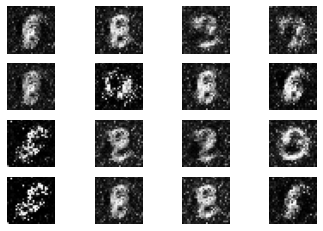

2/2 [==============================] - 0s 23ms/step
1001 [D loss: 0.450164, acc.: 82.03%] [G loss: 1.921989]
2/2 [==============================] - 0s 26ms/step
1002 [D loss: 0.410304, acc.: 91.41%] [G loss: 1.706469]
2/2 [==============================] - 0s 27ms/step
1003 [D loss: 0.390977, acc.: 85.16%] [G loss: 1.849355]
2/2 [==============================] - 0s 30ms/step
1004 [D loss: 0.384892, acc.: 88.28%] [G loss: 1.674155]
2/2 [==============================] - 0s 22ms/step
1005 [D loss: 0.519186, acc.: 72.66%] [G loss: 1.739446]
2/2 [==============================] - 0s 25ms/step
1006 [D loss: 0.409484, acc.: 82.81%] [G loss: 1.856360]
2/2 [==============================] - 0s 25ms/step
1007 [D loss: 0.584692, acc.: 71.09%] [G loss: 1.597366]
2/2 [==============================] - 0s 24ms/step
1008 [D loss: 0.436468, acc.: 82.81%] [G loss: 2.012396]
2/2 [==============================] - 0s 24ms/step
1009 [D loss: 0.475873, acc.: 82.81%] [G loss: 1.960981]
2/2 [==============

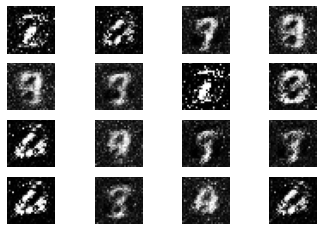

2/2 [==============================] - 0s 20ms/step
1101 [D loss: 0.545962, acc.: 72.66%] [G loss: 1.736220]
2/2 [==============================] - 0s 23ms/step
1102 [D loss: 0.441564, acc.: 87.50%] [G loss: 1.734455]
2/2 [==============================] - 0s 24ms/step
1103 [D loss: 0.568757, acc.: 72.66%] [G loss: 1.609258]
2/2 [==============================] - 0s 27ms/step
1104 [D loss: 0.526599, acc.: 77.34%] [G loss: 1.598185]
2/2 [==============================] - 0s 23ms/step
1105 [D loss: 0.540072, acc.: 72.66%] [G loss: 1.636793]
2/2 [==============================] - 0s 24ms/step
1106 [D loss: 0.446816, acc.: 85.16%] [G loss: 1.655494]
2/2 [==============================] - 0s 24ms/step
1107 [D loss: 0.483573, acc.: 78.12%] [G loss: 1.625196]
2/2 [==============================] - 0s 26ms/step
1108 [D loss: 0.477005, acc.: 81.25%] [G loss: 1.621580]
2/2 [==============================] - 0s 25ms/step
1109 [D loss: 0.498390, acc.: 82.81%] [G loss: 1.548995]
2/2 [==============

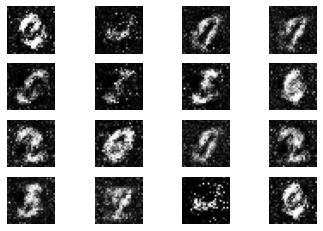

2/2 [==============================] - 0s 23ms/step
1201 [D loss: 0.479436, acc.: 78.91%] [G loss: 1.624224]
2/2 [==============================] - 0s 28ms/step
1202 [D loss: 0.491466, acc.: 75.78%] [G loss: 1.640909]
2/2 [==============================] - 0s 23ms/step
1203 [D loss: 0.480753, acc.: 84.38%] [G loss: 1.549015]
2/2 [==============================] - 0s 28ms/step
1204 [D loss: 0.607328, acc.: 65.62%] [G loss: 1.464373]
2/2 [==============================] - 0s 29ms/step
1205 [D loss: 0.410481, acc.: 88.28%] [G loss: 1.697860]
2/2 [==============================] - 0s 26ms/step
1206 [D loss: 0.535070, acc.: 74.22%] [G loss: 1.488249]
2/2 [==============================] - 0s 25ms/step
1207 [D loss: 0.436219, acc.: 82.03%] [G loss: 1.578466]
2/2 [==============================] - 0s 32ms/step
1208 [D loss: 0.527562, acc.: 74.22%] [G loss: 1.599497]
2/2 [==============================] - 0s 28ms/step
1209 [D loss: 0.495958, acc.: 77.34%] [G loss: 1.474950]
2/2 [==============

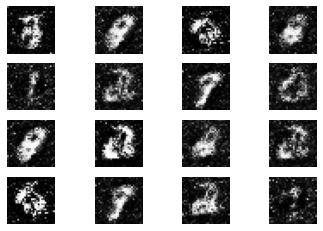

2/2 [==============================] - 0s 22ms/step
1301 [D loss: 0.467541, acc.: 82.81%] [G loss: 1.763122]
2/2 [==============================] - 0s 26ms/step
1302 [D loss: 0.492170, acc.: 79.69%] [G loss: 1.679801]
2/2 [==============================] - 0s 25ms/step
1303 [D loss: 0.509540, acc.: 78.91%] [G loss: 1.638158]
2/2 [==============================] - 0s 24ms/step
1304 [D loss: 0.476556, acc.: 82.03%] [G loss: 1.709752]
2/2 [==============================] - 0s 22ms/step
1305 [D loss: 0.480481, acc.: 82.03%] [G loss: 1.627393]
2/2 [==============================] - 0s 24ms/step
1306 [D loss: 0.471806, acc.: 82.03%] [G loss: 1.755446]
2/2 [==============================] - 0s 23ms/step
1307 [D loss: 0.567594, acc.: 76.56%] [G loss: 1.703851]
2/2 [==============================] - 0s 28ms/step
1308 [D loss: 0.538984, acc.: 74.22%] [G loss: 1.705364]
2/2 [==============================] - 0s 24ms/step
1309 [D loss: 0.557481, acc.: 75.00%] [G loss: 1.591853]
2/2 [==============

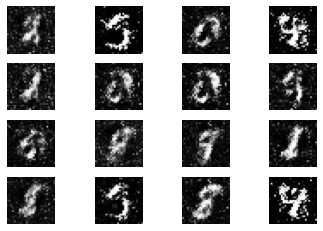

2/2 [==============================] - 0s 25ms/step
1401 [D loss: 0.468628, acc.: 82.81%] [G loss: 1.746823]
2/2 [==============================] - 0s 27ms/step
1402 [D loss: 0.496845, acc.: 74.22%] [G loss: 1.536882]
2/2 [==============================] - 0s 27ms/step
1403 [D loss: 0.585913, acc.: 68.75%] [G loss: 1.647719]
2/2 [==============================] - 0s 21ms/step
1404 [D loss: 0.462930, acc.: 78.12%] [G loss: 1.631666]
2/2 [==============================] - 0s 26ms/step
1405 [D loss: 0.468822, acc.: 83.59%] [G loss: 1.729748]
2/2 [==============================] - 0s 22ms/step
1406 [D loss: 0.563083, acc.: 76.56%] [G loss: 1.616783]
2/2 [==============================] - 0s 20ms/step
1407 [D loss: 0.432217, acc.: 82.81%] [G loss: 1.769298]
2/2 [==============================] - 0s 35ms/step
1408 [D loss: 0.673140, acc.: 57.03%] [G loss: 1.528205]
2/2 [==============================] - 0s 26ms/step
1409 [D loss: 0.511037, acc.: 72.66%] [G loss: 1.820954]
2/2 [==============

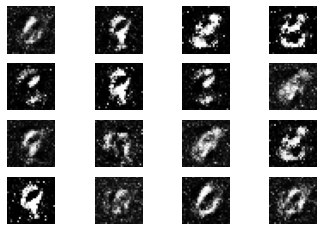

2/2 [==============================] - 0s 18ms/step
1501 [D loss: 0.486612, acc.: 83.59%] [G loss: 1.502639]
2/2 [==============================] - 0s 32ms/step
1502 [D loss: 0.512785, acc.: 75.78%] [G loss: 1.588191]
2/2 [==============================] - 0s 26ms/step
1503 [D loss: 0.518375, acc.: 78.12%] [G loss: 1.780215]
2/2 [==============================] - 0s 29ms/step
1504 [D loss: 0.506236, acc.: 78.12%] [G loss: 1.623647]
2/2 [==============================] - 0s 25ms/step
1505 [D loss: 0.475752, acc.: 82.03%] [G loss: 1.534890]
2/2 [==============================] - 0s 23ms/step
1506 [D loss: 0.533850, acc.: 72.66%] [G loss: 1.501578]
2/2 [==============================] - 0s 25ms/step
1507 [D loss: 0.550055, acc.: 67.97%] [G loss: 1.618116]
2/2 [==============================] - 0s 25ms/step
1508 [D loss: 0.478389, acc.: 84.38%] [G loss: 1.723250]
2/2 [==============================] - 0s 22ms/step
1509 [D loss: 0.553848, acc.: 75.00%] [G loss: 1.667577]
2/2 [==============

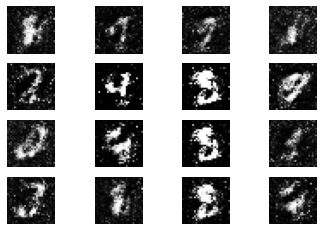

2/2 [==============================] - 0s 26ms/step
1601 [D loss: 0.479388, acc.: 78.12%] [G loss: 1.539846]
2/2 [==============================] - 0s 30ms/step
1602 [D loss: 0.496272, acc.: 79.69%] [G loss: 1.502628]
2/2 [==============================] - 0s 27ms/step
1603 [D loss: 0.536291, acc.: 74.22%] [G loss: 1.659166]
2/2 [==============================] - 0s 24ms/step
1604 [D loss: 0.449427, acc.: 81.25%] [G loss: 1.747522]
2/2 [==============================] - 0s 25ms/step
1605 [D loss: 0.435063, acc.: 85.16%] [G loss: 1.641628]
2/2 [==============================] - 0s 20ms/step
1606 [D loss: 0.489657, acc.: 75.78%] [G loss: 1.722705]
2/2 [==============================] - 0s 26ms/step
1607 [D loss: 0.457102, acc.: 86.72%] [G loss: 1.701010]
2/2 [==============================] - 0s 29ms/step
1608 [D loss: 0.453290, acc.: 87.50%] [G loss: 1.642839]
2/2 [==============================] - 0s 22ms/step
1609 [D loss: 0.499576, acc.: 80.47%] [G loss: 1.642146]
2/2 [==============

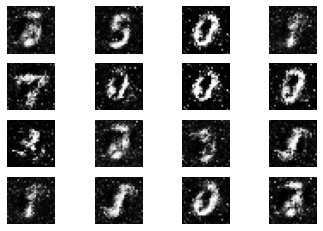

2/2 [==============================] - 0s 24ms/step
1701 [D loss: 0.568695, acc.: 77.34%] [G loss: 1.591020]
2/2 [==============================] - 0s 28ms/step
1702 [D loss: 0.510167, acc.: 81.25%] [G loss: 1.583665]
2/2 [==============================] - 0s 28ms/step
1703 [D loss: 0.572242, acc.: 73.44%] [G loss: 1.480738]
2/2 [==============================] - 0s 24ms/step
1704 [D loss: 0.439990, acc.: 88.28%] [G loss: 1.715228]
2/2 [==============================] - 0s 27ms/step
1705 [D loss: 0.539094, acc.: 75.78%] [G loss: 1.695950]
2/2 [==============================] - 0s 22ms/step
1706 [D loss: 0.468021, acc.: 84.38%] [G loss: 1.714510]
2/2 [==============================] - 0s 35ms/step
1707 [D loss: 0.554224, acc.: 75.00%] [G loss: 1.530168]
2/2 [==============================] - 0s 22ms/step
1708 [D loss: 0.466207, acc.: 82.03%] [G loss: 1.618963]
2/2 [==============================] - 0s 25ms/step
1709 [D loss: 0.483263, acc.: 82.03%] [G loss: 1.501658]
2/2 [==============

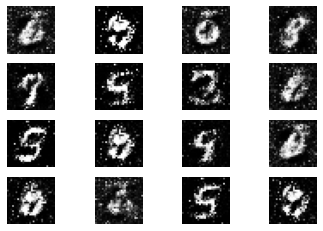

2/2 [==============================] - 0s 24ms/step
1801 [D loss: 0.529699, acc.: 71.09%] [G loss: 1.657033]
2/2 [==============================] - 0s 33ms/step
1802 [D loss: 0.566922, acc.: 71.88%] [G loss: 1.457286]
2/2 [==============================] - 0s 21ms/step
1803 [D loss: 0.485000, acc.: 76.56%] [G loss: 1.799171]
2/2 [==============================] - 0s 21ms/step
1804 [D loss: 0.459544, acc.: 85.94%] [G loss: 1.562441]
2/2 [==============================] - 0s 23ms/step
1805 [D loss: 0.478364, acc.: 75.78%] [G loss: 1.664714]
2/2 [==============================] - 0s 31ms/step
1806 [D loss: 0.544307, acc.: 73.44%] [G loss: 1.609696]
2/2 [==============================] - 0s 26ms/step
1807 [D loss: 0.520089, acc.: 74.22%] [G loss: 1.713820]
2/2 [==============================] - 0s 25ms/step
1808 [D loss: 0.585231, acc.: 71.09%] [G loss: 1.495312]
2/2 [==============================] - 0s 31ms/step
1809 [D loss: 0.494177, acc.: 76.56%] [G loss: 1.656964]
2/2 [==============

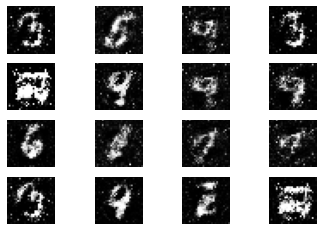

2/2 [==============================] - 0s 28ms/step
1901 [D loss: 0.541746, acc.: 73.44%] [G loss: 1.614461]
2/2 [==============================] - 0s 29ms/step
1902 [D loss: 0.436972, acc.: 82.03%] [G loss: 1.875845]
2/2 [==============================] - 0s 23ms/step
1903 [D loss: 0.524930, acc.: 75.00%] [G loss: 1.603812]
2/2 [==============================] - 0s 44ms/step
1904 [D loss: 0.456470, acc.: 79.69%] [G loss: 1.843605]
2/2 [==============================] - 0s 39ms/step
1905 [D loss: 0.563779, acc.: 74.22%] [G loss: 1.775388]
2/2 [==============================] - 0s 30ms/step
1906 [D loss: 0.415359, acc.: 82.81%] [G loss: 1.868942]
2/2 [==============================] - 0s 26ms/step
1907 [D loss: 0.450781, acc.: 79.69%] [G loss: 1.869384]
2/2 [==============================] - 0s 32ms/step
1908 [D loss: 0.463673, acc.: 75.78%] [G loss: 1.772058]
2/2 [==============================] - 0s 24ms/step
1909 [D loss: 0.534323, acc.: 72.66%] [G loss: 1.734156]
2/2 [==============

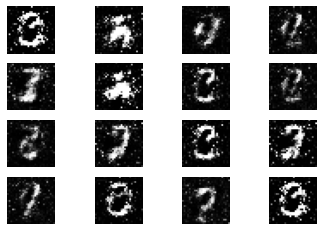

2/2 [==============================] - 0s 24ms/step
2001 [D loss: 0.455712, acc.: 79.69%] [G loss: 1.780785]
2/2 [==============================] - 0s 37ms/step
2002 [D loss: 0.513825, acc.: 77.34%] [G loss: 1.897944]
2/2 [==============================] - 0s 32ms/step
2003 [D loss: 0.550212, acc.: 73.44%] [G loss: 1.833856]
2/2 [==============================] - 0s 23ms/step
2004 [D loss: 0.387131, acc.: 87.50%] [G loss: 1.940095]
2/2 [==============================] - 0s 29ms/step
2005 [D loss: 0.440824, acc.: 84.38%] [G loss: 1.741296]
2/2 [==============================] - 0s 29ms/step
2006 [D loss: 0.386635, acc.: 86.72%] [G loss: 1.805629]
2/2 [==============================] - 0s 29ms/step
2007 [D loss: 0.466129, acc.: 83.59%] [G loss: 1.847528]
2/2 [==============================] - 0s 25ms/step
2008 [D loss: 0.406364, acc.: 84.38%] [G loss: 1.929951]
2/2 [==============================] - 0s 24ms/step
2009 [D loss: 0.517195, acc.: 75.00%] [G loss: 1.772172]
2/2 [==============

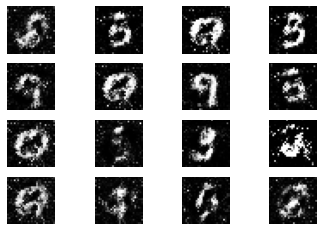

2/2 [==============================] - 0s 24ms/step
2101 [D loss: 0.467775, acc.: 83.59%] [G loss: 1.870206]
2/2 [==============================] - 0s 24ms/step
2102 [D loss: 0.549028, acc.: 75.00%] [G loss: 1.643671]
2/2 [==============================] - 0s 26ms/step
2103 [D loss: 0.485409, acc.: 80.47%] [G loss: 1.884768]
2/2 [==============================] - 0s 24ms/step
2104 [D loss: 0.545506, acc.: 74.22%] [G loss: 1.669697]
2/2 [==============================] - 0s 23ms/step
2105 [D loss: 0.556339, acc.: 69.53%] [G loss: 1.531706]
2/2 [==============================] - 0s 27ms/step
2106 [D loss: 0.485302, acc.: 75.00%] [G loss: 1.795801]
2/2 [==============================] - 0s 27ms/step
2107 [D loss: 0.653257, acc.: 68.75%] [G loss: 1.682103]
2/2 [==============================] - 0s 30ms/step
2108 [D loss: 0.487767, acc.: 79.69%] [G loss: 1.627769]
2/2 [==============================] - 0s 36ms/step
2109 [D loss: 0.542278, acc.: 69.53%] [G loss: 1.718818]
2/2 [==============

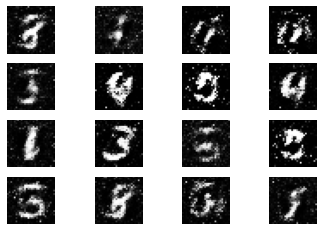

2/2 [==============================] - 0s 24ms/step
2201 [D loss: 0.514184, acc.: 78.91%] [G loss: 1.616011]
2/2 [==============================] - 0s 25ms/step
2202 [D loss: 0.495478, acc.: 75.00%] [G loss: 1.676356]
2/2 [==============================] - 0s 22ms/step
2203 [D loss: 0.561204, acc.: 71.88%] [G loss: 1.718527]
2/2 [==============================] - 0s 27ms/step
2204 [D loss: 0.481127, acc.: 77.34%] [G loss: 1.781591]
2/2 [==============================] - 0s 25ms/step
2205 [D loss: 0.404764, acc.: 82.81%] [G loss: 1.874593]
2/2 [==============================] - 0s 24ms/step
2206 [D loss: 0.467391, acc.: 82.81%] [G loss: 1.762768]
2/2 [==============================] - 0s 22ms/step
2207 [D loss: 0.573299, acc.: 71.88%] [G loss: 1.511505]
2/2 [==============================] - 0s 24ms/step
2208 [D loss: 0.473802, acc.: 78.91%] [G loss: 1.727198]
2/2 [==============================] - 0s 28ms/step
2209 [D loss: 0.490166, acc.: 82.03%] [G loss: 1.696637]
2/2 [==============

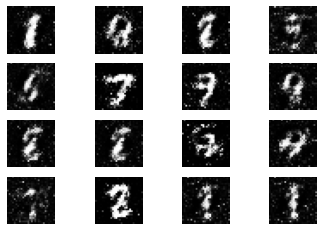

2/2 [==============================] - 0s 22ms/step
2301 [D loss: 0.587949, acc.: 71.09%] [G loss: 1.409751]
2/2 [==============================] - 0s 20ms/step
2302 [D loss: 0.444870, acc.: 80.47%] [G loss: 1.632489]
2/2 [==============================] - 0s 28ms/step
2303 [D loss: 0.497436, acc.: 77.34%] [G loss: 1.706082]
2/2 [==============================] - 0s 23ms/step
2304 [D loss: 0.620881, acc.: 64.84%] [G loss: 1.449939]
2/2 [==============================] - 0s 32ms/step
2305 [D loss: 0.479325, acc.: 75.78%] [G loss: 1.681564]
2/2 [==============================] - 0s 24ms/step
2306 [D loss: 0.508284, acc.: 76.56%] [G loss: 1.700791]
2/2 [==============================] - 0s 27ms/step
2307 [D loss: 0.493540, acc.: 79.69%] [G loss: 1.767069]
2/2 [==============================] - 0s 30ms/step
2308 [D loss: 0.511720, acc.: 75.00%] [G loss: 1.649778]
2/2 [==============================] - 0s 25ms/step
2309 [D loss: 0.518336, acc.: 74.22%] [G loss: 1.628659]
2/2 [==============

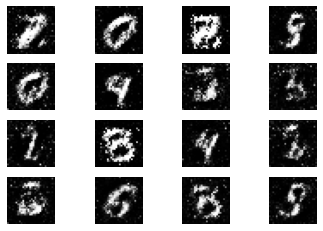

2/2 [==============================] - 0s 22ms/step
2401 [D loss: 0.461341, acc.: 77.34%] [G loss: 1.672294]
2/2 [==============================] - 0s 21ms/step
2402 [D loss: 0.479493, acc.: 77.34%] [G loss: 1.657516]
2/2 [==============================] - 0s 24ms/step
2403 [D loss: 0.521255, acc.: 76.56%] [G loss: 1.720362]
2/2 [==============================] - 0s 27ms/step
2404 [D loss: 0.416076, acc.: 87.50%] [G loss: 1.919005]
2/2 [==============================] - 0s 30ms/step
2405 [D loss: 0.461630, acc.: 78.91%] [G loss: 1.850364]
2/2 [==============================] - 0s 26ms/step
2406 [D loss: 0.465819, acc.: 81.25%] [G loss: 1.505865]
2/2 [==============================] - 0s 26ms/step
2407 [D loss: 0.529099, acc.: 72.66%] [G loss: 1.515595]
2/2 [==============================] - 0s 25ms/step
2408 [D loss: 0.473575, acc.: 81.25%] [G loss: 1.586402]
2/2 [==============================] - 0s 26ms/step
2409 [D loss: 0.446035, acc.: 77.34%] [G loss: 1.672953]
2/2 [==============

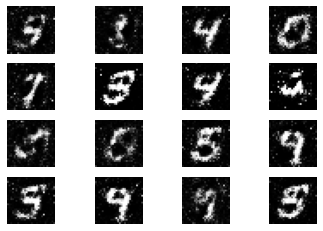

2/2 [==============================] - 0s 33ms/step
2501 [D loss: 0.518515, acc.: 75.00%] [G loss: 1.638512]
2/2 [==============================] - 0s 22ms/step
2502 [D loss: 0.540106, acc.: 75.00%] [G loss: 1.647023]
2/2 [==============================] - 0s 24ms/step
2503 [D loss: 0.544946, acc.: 75.78%] [G loss: 1.574788]
2/2 [==============================] - 0s 23ms/step
2504 [D loss: 0.644353, acc.: 62.50%] [G loss: 1.445866]
2/2 [==============================] - 0s 31ms/step
2505 [D loss: 0.554265, acc.: 67.19%] [G loss: 1.528396]
2/2 [==============================] - 0s 23ms/step
2506 [D loss: 0.540362, acc.: 68.75%] [G loss: 1.560030]
2/2 [==============================] - 0s 19ms/step
2507 [D loss: 0.534914, acc.: 78.12%] [G loss: 1.697237]
2/2 [==============================] - 0s 30ms/step
2508 [D loss: 0.435338, acc.: 81.25%] [G loss: 1.735244]
2/2 [==============================] - 0s 41ms/step
2509 [D loss: 0.550751, acc.: 70.31%] [G loss: 1.553005]
2/2 [==============

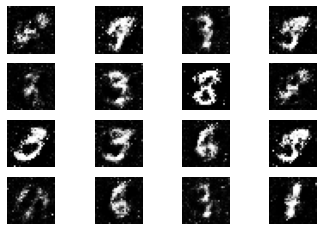

2/2 [==============================] - 0s 27ms/step
2601 [D loss: 0.600998, acc.: 71.09%] [G loss: 1.454416]
2/2 [==============================] - 0s 24ms/step
2602 [D loss: 0.595532, acc.: 65.62%] [G loss: 1.526895]
2/2 [==============================] - 0s 28ms/step
2603 [D loss: 0.493414, acc.: 78.12%] [G loss: 1.650193]
2/2 [==============================] - 0s 23ms/step
2604 [D loss: 0.548110, acc.: 72.66%] [G loss: 1.509201]
2/2 [==============================] - 0s 26ms/step
2605 [D loss: 0.525137, acc.: 75.00%] [G loss: 1.474086]
2/2 [==============================] - 0s 26ms/step
2606 [D loss: 0.546905, acc.: 75.00%] [G loss: 1.656498]
2/2 [==============================] - 0s 25ms/step
2607 [D loss: 0.588700, acc.: 69.53%] [G loss: 1.729921]
2/2 [==============================] - 0s 24ms/step
2608 [D loss: 0.690806, acc.: 57.03%] [G loss: 1.382717]
2/2 [==============================] - 0s 22ms/step
2609 [D loss: 0.573657, acc.: 69.53%] [G loss: 1.547538]
2/2 [==============

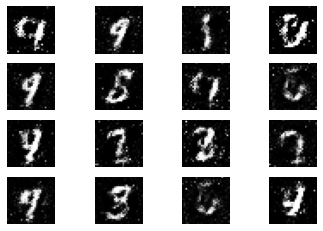

2/2 [==============================] - 0s 25ms/step
2701 [D loss: 0.517458, acc.: 73.44%] [G loss: 1.462762]
2/2 [==============================] - 0s 27ms/step
2702 [D loss: 0.523283, acc.: 75.00%] [G loss: 1.603143]
2/2 [==============================] - 0s 22ms/step
2703 [D loss: 0.548030, acc.: 76.56%] [G loss: 1.406064]
2/2 [==============================] - 0s 23ms/step
2704 [D loss: 0.552392, acc.: 69.53%] [G loss: 1.585639]
2/2 [==============================] - 0s 23ms/step
2705 [D loss: 0.556939, acc.: 67.97%] [G loss: 1.519295]
2/2 [==============================] - 0s 23ms/step
2706 [D loss: 0.533167, acc.: 71.88%] [G loss: 1.667115]
2/2 [==============================] - 0s 26ms/step
2707 [D loss: 0.506941, acc.: 75.00%] [G loss: 1.592784]
2/2 [==============================] - 0s 25ms/step
2708 [D loss: 0.487283, acc.: 76.56%] [G loss: 1.587055]
2/2 [==============================] - 0s 24ms/step
2709 [D loss: 0.548483, acc.: 66.41%] [G loss: 1.570902]
2/2 [==============

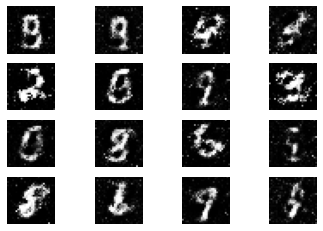

2/2 [==============================] - 0s 26ms/step
2801 [D loss: 0.568505, acc.: 70.31%] [G loss: 1.449904]
2/2 [==============================] - 0s 22ms/step
2802 [D loss: 0.509970, acc.: 75.00%] [G loss: 1.482975]
2/2 [==============================] - 0s 23ms/step
2803 [D loss: 0.513616, acc.: 78.12%] [G loss: 1.446601]
2/2 [==============================] - 0s 21ms/step
2804 [D loss: 0.590829, acc.: 73.44%] [G loss: 1.469460]
2/2 [==============================] - 0s 24ms/step
2805 [D loss: 0.462772, acc.: 78.91%] [G loss: 1.554160]
2/2 [==============================] - 0s 29ms/step
2806 [D loss: 0.672874, acc.: 56.25%] [G loss: 1.385054]
2/2 [==============================] - 0s 26ms/step
2807 [D loss: 0.504771, acc.: 77.34%] [G loss: 1.396013]
2/2 [==============================] - 0s 20ms/step
2808 [D loss: 0.580804, acc.: 67.97%] [G loss: 1.436651]
2/2 [==============================] - 0s 24ms/step
2809 [D loss: 0.534685, acc.: 72.66%] [G loss: 1.501012]
2/2 [==============

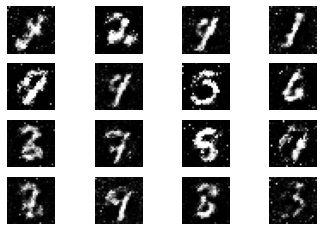

2/2 [==============================] - 0s 25ms/step
2901 [D loss: 0.437336, acc.: 80.47%] [G loss: 1.723288]
2/2 [==============================] - 0s 24ms/step
2902 [D loss: 0.591050, acc.: 69.53%] [G loss: 1.484158]
2/2 [==============================] - 0s 19ms/step
2903 [D loss: 0.495619, acc.: 75.00%] [G loss: 1.590526]
2/2 [==============================] - 0s 28ms/step
2904 [D loss: 0.571491, acc.: 65.62%] [G loss: 1.579957]
2/2 [==============================] - 0s 26ms/step
2905 [D loss: 0.511378, acc.: 75.78%] [G loss: 1.547569]
2/2 [==============================] - 0s 24ms/step
2906 [D loss: 0.516145, acc.: 75.00%] [G loss: 1.550982]
2/2 [==============================] - 0s 25ms/step
2907 [D loss: 0.491308, acc.: 79.69%] [G loss: 1.555974]
2/2 [==============================] - 0s 24ms/step
2908 [D loss: 0.483150, acc.: 80.47%] [G loss: 1.528081]
2/2 [==============================] - 0s 23ms/step
2909 [D loss: 0.548873, acc.: 73.44%] [G loss: 1.678811]
2/2 [==============

In [2]:
class GAN():
    def __init__(self):
        self.IMG_HIGH = 28
        self.IMG_WIDTH = 28
        self.channel = 1
        self.img_shape = (self.IMG_HIGH, self.IMG_WIDTH, self.channel)

        optimizer = tf.keras.optimizers.Adam(0.0001, 0.5)

        # Build and compile the discriminator
        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss='binary_crossentropy',
            optimizer=optimizer,
            metrics=['accuracy'])

        # Build and compile the generator
        self.generator = self.build_generator()
        self.generator.compile(loss='binary_crossentropy', optimizer=optimizer)

        # The generator takes noise as input and generated imgs
        z = Input(shape=(100,))
        img = self.generator(z)

        # For the combined model we will only train the generator
        self.discriminator.trainable = False

        # The valid takes generated images as input and determines validity
        valid = self.discriminator(img)

        # The combined model  (stacked generator and discriminator) takes
        # noise as input => generates images => determines validity
        self.combined = Model(z, valid)
        self.combined.compile(loss='binary_crossentropy', optimizer=optimizer)

    def build_generator(self):

        noise_shape = (100,)

        model = Sequential()

        model.add(Dense(256))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(512,input_shape=(100,)))
        model.add(BatchNormalization(momentum=0.8))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dense(1024))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(2048))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(np.prod(self.img_shape), activation='tanh'))
        model.add(Reshape(self.img_shape))

        noise = Input(shape=noise_shape)
        img = model(noise)

        return Model(noise, img)

    def build_discriminator(self):

        img_shape = (self.IMG_HIGH, self.IMG_WIDTH, self.channel)

        model = Sequential()

        model.add(Flatten(input_shape=img_shape))
        model.add(Dense(1024))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dense(512))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dense(256))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dense(1, activation='sigmoid'))
        model.summary()

        img = Input(shape=img_shape)
        validity = model(img)

        return Model(img, validity)

    def train(self, epochs, batch_size=128, save_interval=50):

        # Load the dataset
        (X_train, _), (_, _) = tf.keras.datasets.mnist.load_data()

        # Rescale -1 to 1
        X_train = (X_train.astype(np.float32) - 127.5) / 127.5
        X_train = np.expand_dims(X_train, axis=3)

        half_batch = int(batch_size / 2)

        for epoch in range(epochs):

            # ---------------------
            #  Train Discriminator
            # ---------------------

            # Select a random half batch of images
            idx = np.random.randint(0, X_train.shape[0], half_batch)
            imgs = X_train[idx]

            noise = np.random.normal(0, 1, (half_batch, 100))

            # Generate a half batch of new images
            gen_imgs = self.generator.predict(noise)

            # Train the discriminator
            d_loss_real = self.discriminator.train_on_batch(imgs, np.ones((half_batch, 1)))
            d_loss_fake = self.discriminator.train_on_batch(gen_imgs, np.zeros((half_batch, 1)))
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)


            # ---------------------
            #  Train Generator
            # ---------------------

            noise = np.random.normal(0, 1, (batch_size, 100))

            # The generator wants the discriminator to label the generated samples
            # as valid (ones)
            valid_y = np.array([1] * batch_size)

            # Train the generator
            g_loss = self.combined.train_on_batch(noise, valid_y)

            # Plot the progress
            print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))

            # If at save interval => save generated image samples
            if epoch % save_interval == 0:
                self.plot_imgs(epoch)

    def plot_imgs(self, epoch):
        h, w = 4, 4
        noise = np.random.normal(0, 1, (h * w, 100))
        gen_imgs = self.generator.predict(noise)

        # Rescale images 0 - 1
        gen_imgs = 0.5 * gen_imgs + 0.5

        fig, axs = plt.subplots(h, w)
        cnt = 0
        for i in range(h):
            for j in range(w):
                axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
                axs[i,j].axis('off')
                cnt += 1
        plt.show()


if __name__ == '__main__':
    gan = GAN()
    gan.train(epochs=3000, batch_size=128, save_interval=100)


1. I have trained the model for 3000 epochs and plotted the results for the interval of 100 epochs.

2. This project was for the MNIST data set, a one-channel image project. In the next step, I am going to do the same task for the image with three channels. After that, I aim to do more complicated models like pix2pix and cycleGAN.


